importing required modules for the project

In [1]:
#for importing dataset
import pandas as pd

#used to work with multi dimensional array and its operations in an effective manner.
import numpy as np

#for visualization purpose
import matplotlib.pyplot as plt

#for dividing the data into training and testing purpose
from sklearn.model_selection import train_test_split

#scaling to nearest values from -1 to 1
from sklearn.preprocessing import StandardScaler

#for finding accuracy of the model
from sklearn.metrics import accuracy_score,confusion_matrix


#classification models in Machine learning
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns

Loading the dataset

In [2]:
data=pd.read_csv("creditcard.csv")


In [3]:
#information regrading to dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.shape
#it shows that number of rows and columns (rows,columns)

(284807, 31)

In [5]:
data.shape[0],data.shape[1]

(284807, 31)

In [6]:
data.head()

#to 5 rows in the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.tail()

#display last five lines

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
#full description of the dataset and their features
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
col=data.columns
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

0    284315
1       492
Name: Class, dtype: int64


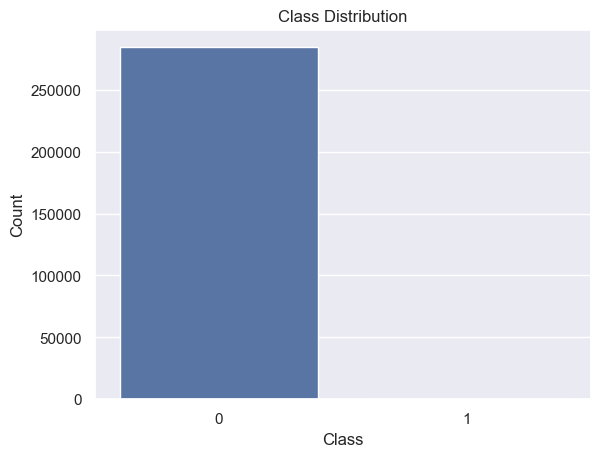

In [10]:
#to visulaize the number of frauds and non fraud trans
class_counts = data['Class'].value_counts()
x=class_counts.values
print(class_counts)
# Create a bar plot of the class counts
sns.set(style='darkgrid')
sns.barplot(x=class_counts.index, y=class_counts.values)

# Add labels and title
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [11]:
#as we obseve that there are no Nan values in the dataset as we observe in the information of dataset
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [12]:
#then now finding outliers in the dataset,the best of finding outliers is to analysis by histogram.


independent = list(col[:len(col)-1])
dependent=col[-1]

print("Independent column variables in the datasset:\n",independent)
print("\nDependent column variable that we need to find or precict is :\n" , dependent)

Independent column variables in the datasset:
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

Dependent column variable that we need to find or precict is :
 Class


In [13]:
#visulaizing the data independent vs dependent variables
# Compute the IQR for each feature
Q1 = data[independent].quantile(0.25)
Q3 = data[independent].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers
outliers = ((data[independent] < (Q1 - 1.5 * IQR)) | (data[independent] > (Q3 + 1.5 * IQR))).any(axis=1)

print(outliers)
# Count the number of outliers
n_outliers = np.sum(outliers)

# Print the results
print("\nNumber of outliers found: {}".format(n_outliers))    

0         False
1         False
2          True
3         False
4         False
          ...  
284802     True
284803    False
284804     True
284805     True
284806     True
Length: 284807, dtype: bool

Number of outliers found: 138473


Capping:
    Capping involves setting a threshold for extreme values and replacing any values that fall outside that range with
    the nearest threshold value. For example, you might cap all values above the 99th percentile or below the 1st percentile.

Time  No outliers at lower bound  No outlier at upper bound


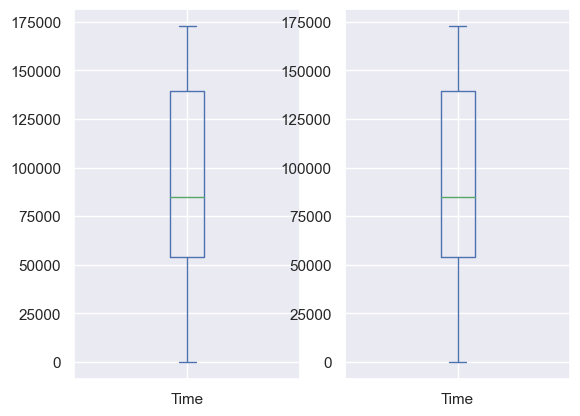

V1  Outlier at lower bound
No outlier at upper bound


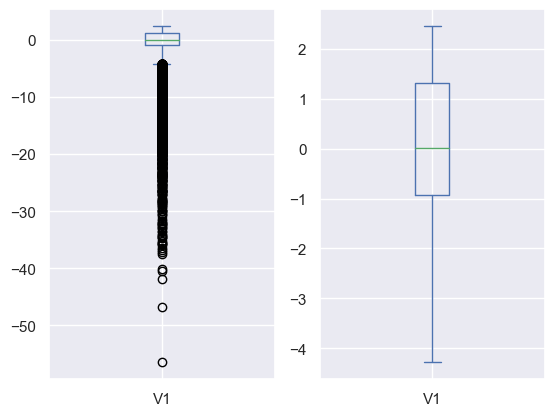

V2  Outlier at lower bound
Outlier at upper bound


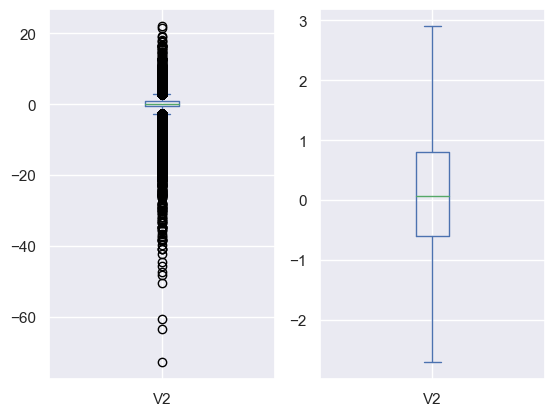

V3  Outlier at lower bound
Outlier at upper bound


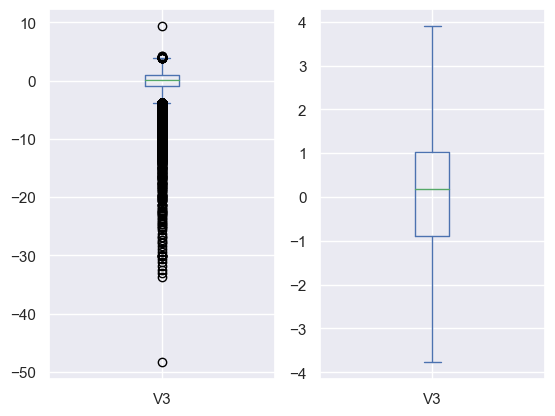

V4  Outlier at lower bound
Outlier at upper bound


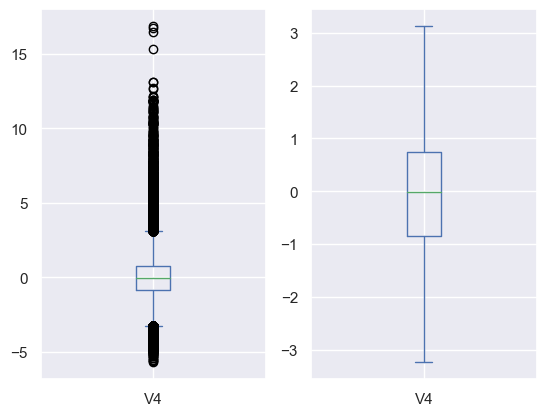

V5  Outlier at lower bound
Outlier at upper bound


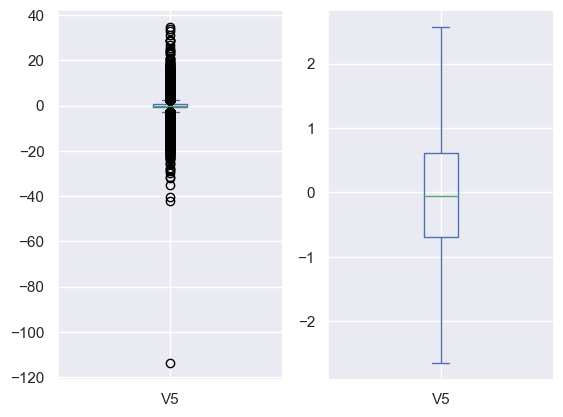

V6  Outlier at lower bound
Outlier at upper bound


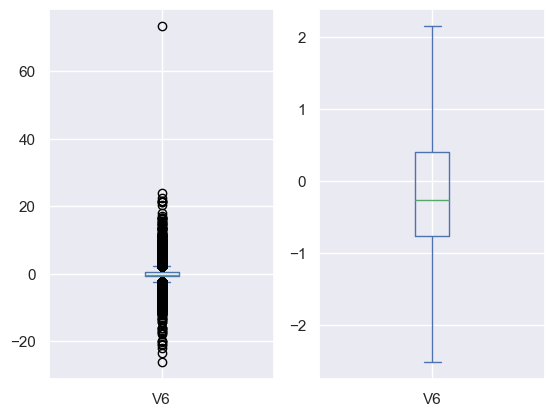

V7  Outlier at lower bound
Outlier at upper bound


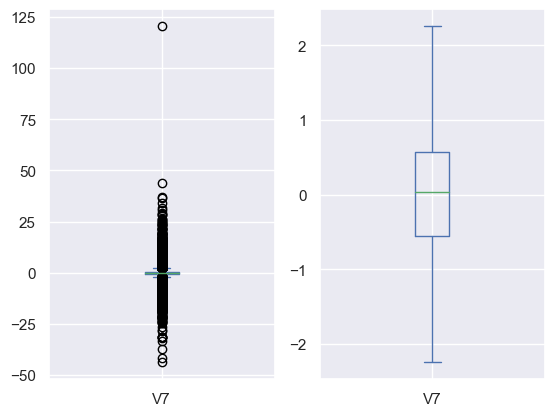

V8  Outlier at lower bound
Outlier at upper bound


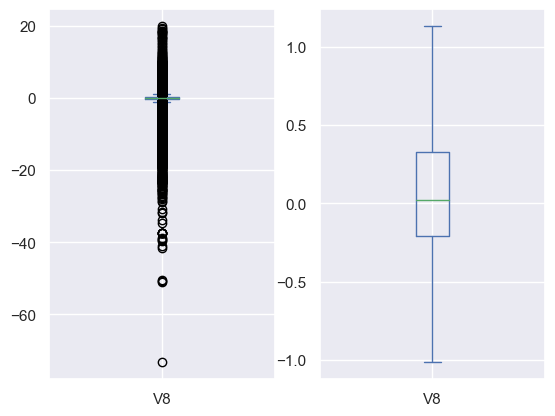

V9  Outlier at lower bound
Outlier at upper bound


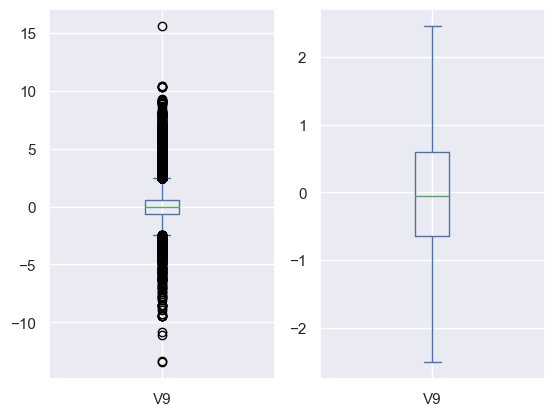

V10  Outlier at lower bound
Outlier at upper bound


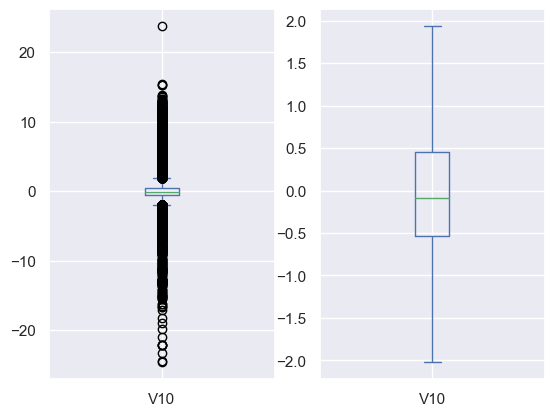

V11  Outlier at lower bound
Outlier at upper bound


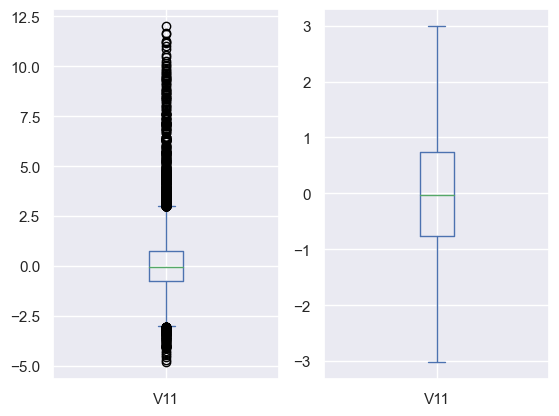

V12  Outlier at lower bound
Outlier at upper bound


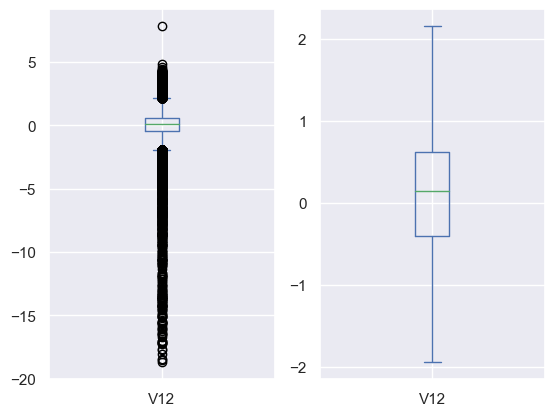

V13  Outlier at lower bound
Outlier at upper bound


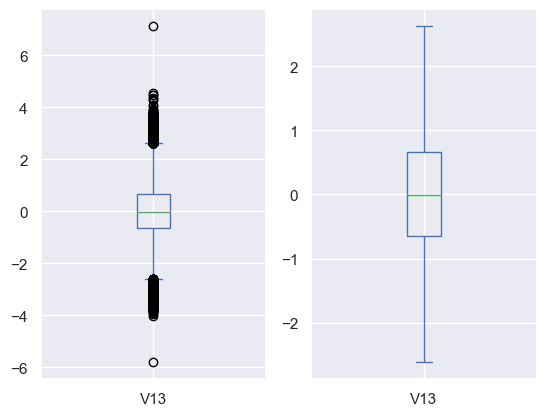

V14  Outlier at lower bound
Outlier at upper bound


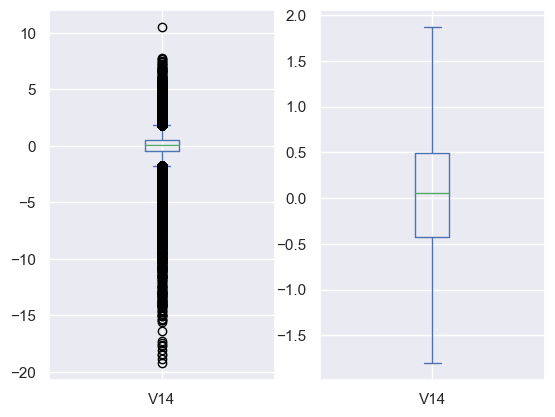

V15  Outlier at lower bound
Outlier at upper bound


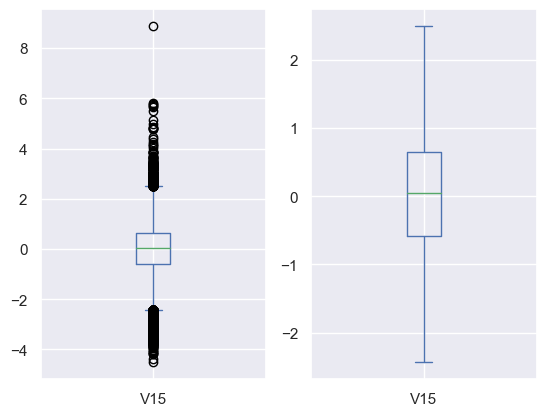

V16  Outlier at lower bound
Outlier at upper bound


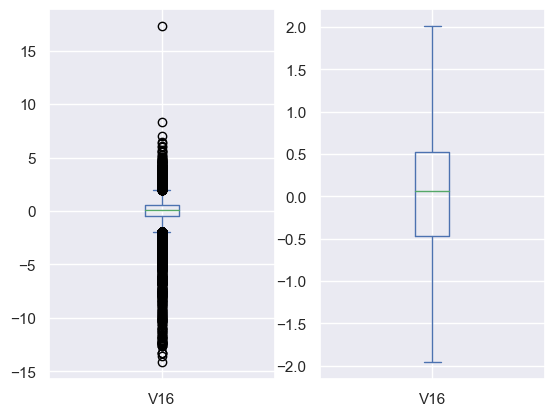

V17  Outlier at lower bound
Outlier at upper bound


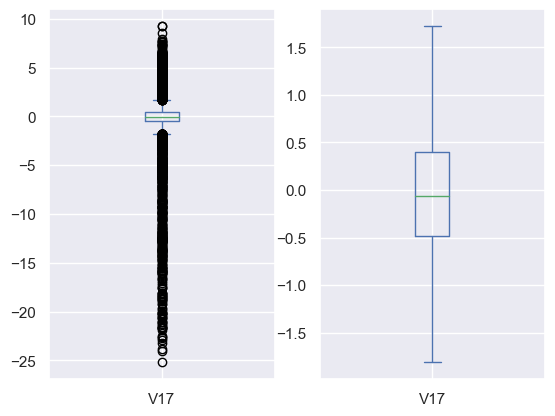

V18  Outlier at lower bound
Outlier at upper bound


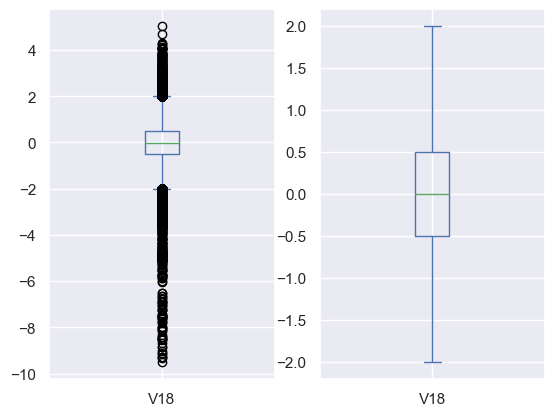

V19  Outlier at lower bound
Outlier at upper bound


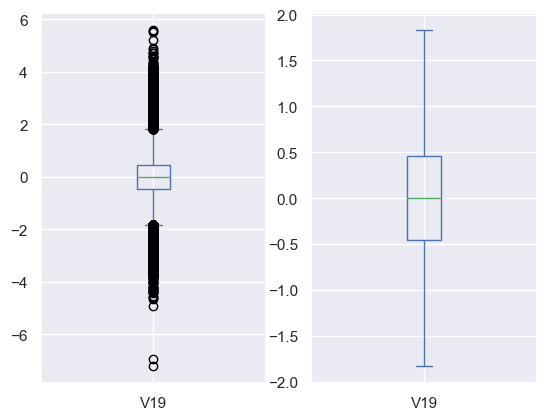

V20  Outlier at lower bound
Outlier at upper bound


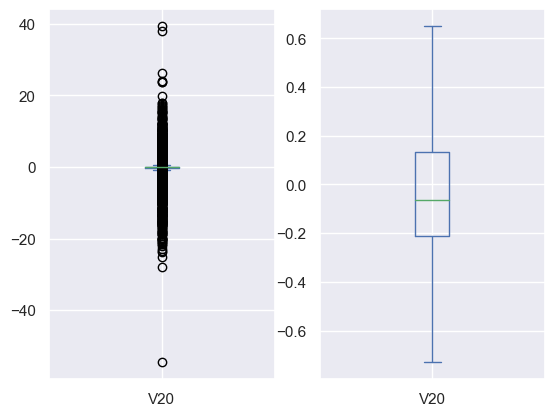

V21  Outlier at lower bound
Outlier at upper bound


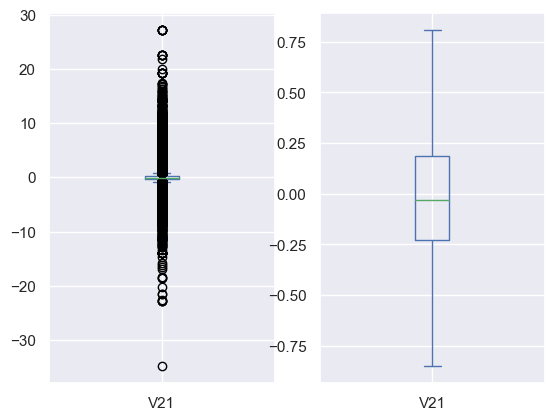

V22  Outlier at lower bound
Outlier at upper bound


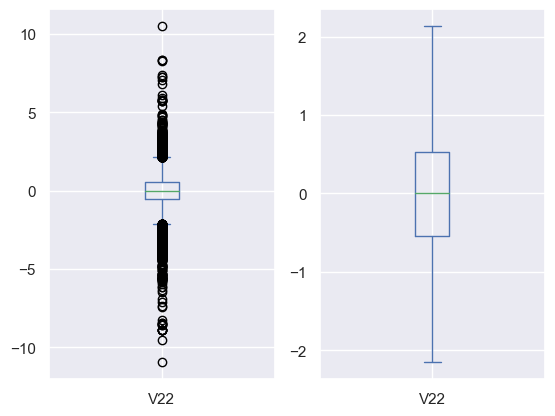

V23  Outlier at lower bound
Outlier at upper bound


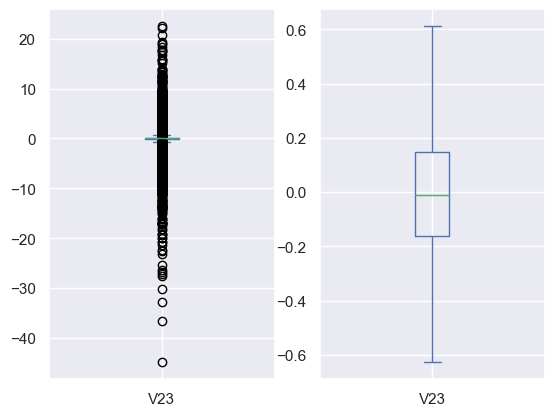

V24  Outlier at lower bound
Outlier at upper bound


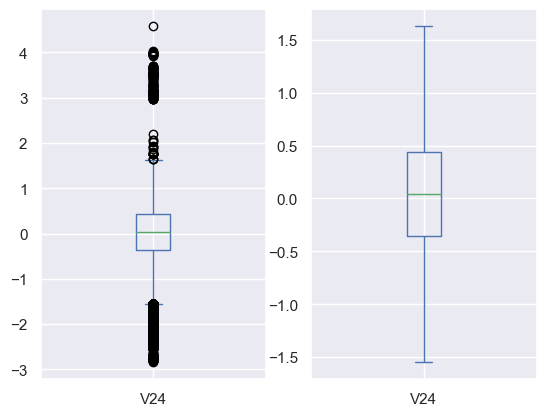

V25  Outlier at lower bound
Outlier at upper bound


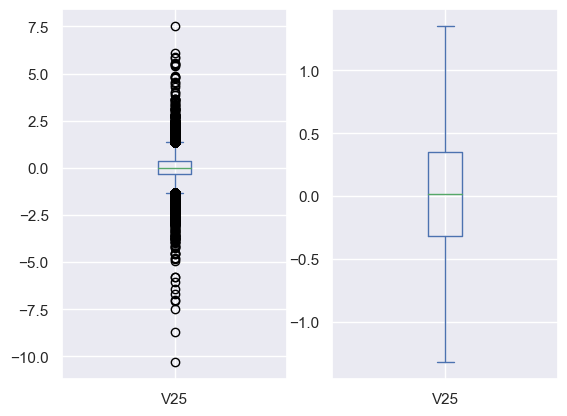

V26  Outlier at lower bound
Outlier at upper bound


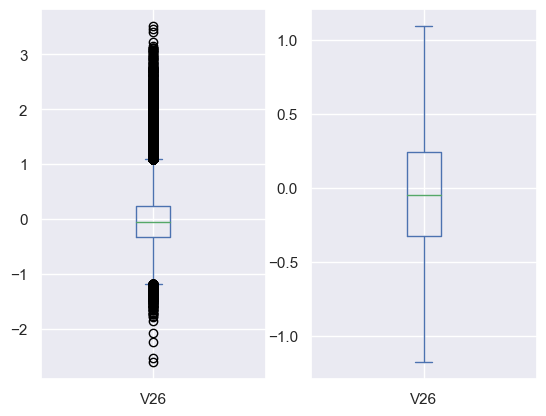

V27  Outlier at lower bound
Outlier at upper bound


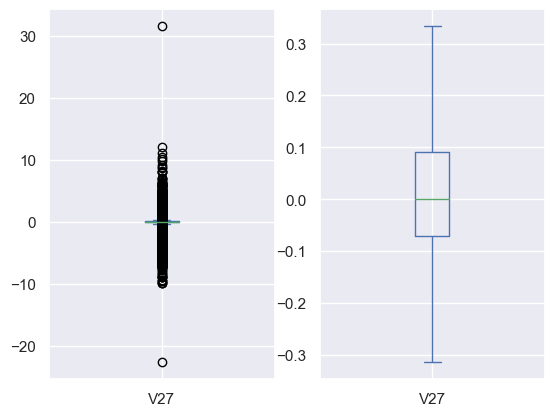

V28  Outlier at lower bound
Outlier at upper bound


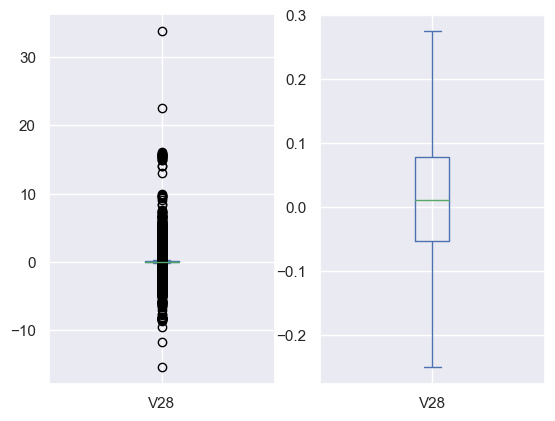

Amount  No outliers at lower bound  Outlier at upper bound


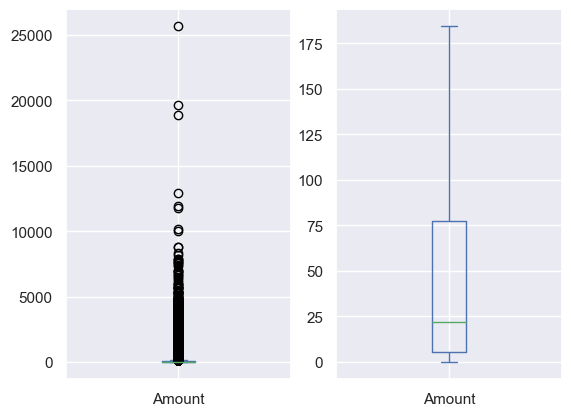

In [14]:
for i in range(0,len(independent)):
    print(independent[i],end="  ")
    p0   =  data[independent[i]].min()
    p100 =  data[independent[i]].max()
    q1   =  data[independent[i]].quantile(0.25)
    q2   =  data[independent[i]].quantile(0.5)
    q3   =  data[independent[i]].quantile(0.75)
    iqr=q3-q1

    #lower cut off 
    lc=q1-1.5*iqr

    #upper cutoff
    uc=q3+1.5*iqr
    
    if lc < p0:
        print("No outliers at lower bound",end="  ")
    else:
        print("Outlier at lower bound")
    
    if uc > p100:
        print("No outlier at upper bound")
    else:
        print("Outlier at upper bound")
        
    plt.subplot(1,2,1)
    data[independent[i]].plot(kind="box")
    data[independent[i]].clip(lower=lc,upper=uc,inplace=True)
    plt.subplot(1,2,2)
    data[independent[i]].plot(kind='box')
    plt.show()
    
    

After performing the aciton on outliers then we are checking again outliers are exists or not

In [15]:

Q1 = data[independent].quantile(0.25)
Q3 = data[independent].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers
outliers = ((data[independent] < (Q1 - 1.5 * IQR)) | (data[independent] > (Q3 + 1.5 * IQR))).any(axis=1)

print(outliers)
# Count the number of outliers
n_outliers = np.sum(outliers)

# Print the results
print("\nNumber of outliers found: {}".format(n_outliers))    

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

Number of outliers found: 0


In [16]:
#as we all observe that there is we have checked Nan values (missing values) and outliers in the dataset and how to handle outliers for all features

In [17]:
#now we are  trying to to sepearate the independent and dependent features of the dataset
independent

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [18]:
dependent  #target feature

'Class'

In [19]:
x=data[independent]
x.shape

(284807, 30)

In [20]:
y=data[dependent]
y.shape

(284807,)

In [21]:
#splitting into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [22]:
x_train.shape,y_train.shape  #for training purpose

((213605, 30), (213605,))

In [23]:
x_test.shape,y_test.shape  #for testing purpose using the model

((71202, 30), (71202,))

In [24]:
#standard Scaling the x_trian
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [25]:
#creating the model for DecisionTreeClassifier
modelObj=DecisionTreeClassifier(random_state=42)

#fittng training data to the model
modelObj.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
#predicting the test data.
y_pred = modelObj.predict(x_test)

In [34]:
print("Actual_value   Predicted_value")
for i,j in zip(y_test,y_pred):
    print(i,j)

Actual_value   Predicted_value
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [28]:
accuracy=accuracy_score(y_test,y_pred)

In [29]:
print("accuracy of decision tree classifier is : ",accuracy*100,"%")

accuracy of decision tree classifier is :  99.90028369989608 %


CONFUSION MATRIX:
                    Predicted Positive    Predicted Negative
Actual Positive      TP                    FN
Actual Negative      FP                    TN


In [30]:
cm=confusion_matrix(y_test,y_pred)

In [31]:
print(cm)

[[71064    27]
 [   44    67]]


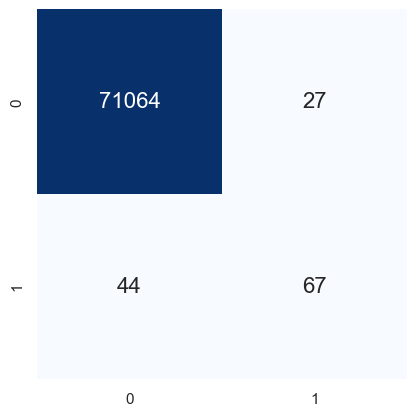

In [32]:

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False, square=True)
plt.show()